In [3]:
#นับจำนวน frequency ของ grid ทุก dataset
import xarray as xr
import xclim as xc
# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

ds_tmin['mn2t'].attrs['units'] = 'degC'

# ดูค่า attribute ของ dataset
#print("Dataset attributes:")
#print(ds_tmin.attrs)

# ตรวจสอบค่า frequency
frequency = ds_tmin.attrs.get('frequency', 'Unknown')
#print(f"\nFrequency of the dataset: {frequency}")

# เลือกข้อมูลตัวแปร tmin สำหรับปี 1960
data_1960 = ds_tmin['mn2t'].sel(time=slice('1960-01-01', '1960-12-31'))

# เลือกตำแหน่ง grid ที่ต้องการ
# ตัวอย่างนี้เลือก grid แรก (latitude และ longitude แรก)
latitude = ds_tmin.latitude[0].item()
longitude = ds_tmin.longitude[0].item()

print(f"\nSelected grid location - Latitude: {latitude}, Longitude: {longitude}")

# ดึงข้อมูลสำหรับ grid ที่เลือก
grid_data_1960 = data_1960.sel(latitude=latitude, longitude=longitude, method='nearest')

# แปลงค่าจากเคลวินเป็นองศาเซลเซียส
grid_data_1960_celsius = grid_data_1960 - 273.15

# # แสดงข้อมูลทั้งหมดของ grid ที่เลือกในปี 1960
print("\nData for the selected grid in 1960 (in Celsius):")
print(grid_data_1960_celsius.values)




Selected grid location - Latitude: 22.0, Longitude: 95.0

Data for the selected grid in 1960 (in Celsius):
[18.92558586 19.24883304 19.66749123 20.39740263 20.56964383 20.74129516
 20.76071162 20.75437055 20.80677041 20.45884712 20.65438807 20.27205587
 20.51439294 20.32106399 20.6014475  21.47189474 21.29252598 21.23122895
 20.24787132 20.41042886 21.2764521  21.72607831 21.65499932 20.68550356
 20.77481927 20.4151478  20.64298397 20.29702691 20.31069216 20.53901989
 20.71081869 21.09035037 21.306292   21.9106156  22.45856189 23.12364422
 22.50563985 22.72931603 23.23577292 23.59008708 23.97484766 24.42269182
 24.49918791 24.49181103 24.15868865 24.53795011 24.2971506  24.24439468
 24.40655209 24.59897709 24.30837241 24.68235828 24.58797882 24.08724461
 23.89240535 23.71804255 24.24072859 23.98902023 23.91449131 23.87148182
 23.8281274  24.58273346 24.09555141 23.26949138 24.17545934 24.84903327
 25.35073995 25.45879778 25.8438128  25.6147464  26.34821755 26.74339532
 25.5828192  26.

In [60]:
import xarray as xr
import xclim as xc

# เปิดไฟล์ NetCDF
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")

# เลือกข้อมูลตัวแปร tmin สำหรับปี 1960
data_1960 = ds_tmin['mn2t'].sel(time=slice('1960-01-01', '1960-12-31'))

# เลือกตำแหน่ง grid ที่ต้องการ
latitude = ds_tmin.latitude[0].item()
longitude = ds_tmin.longitude[0].item()

# ดึงข้อมูลสำหรับ grid ที่เลือก
grid_data_1960 = data_1960.sel(latitude=latitude, longitude=longitude, method='nearest')

# แปลงค่าจากเคลวินเป็นองศาเซลเซียส
grid_data_1960_celsius = grid_data_1960 - 273.15
grid_data_1960_celsius.attrs['units'] = 'degC'  # ตั้งค่าหน่วยใหม่เป็นองศาเซลเซียส

# แสดงค่าหลังแปลงหน่วย
#print("\nData converted to Celsius:")
#print(grid_data_1960_celsius.values)

# # หาค่า TNn (Minimum Daily Minimum Temperature)
tnn = xc.atmos.tn_min(grid_data_1960_celsius) - 273.15

# # แสดงค่า TNn
print("\nTNn (Minimum Daily Minimum Temperature) for the selected grid in 1960 (in Celsius):")
print(tnn.values)








TNn (Minimum Daily Minimum Temperature) for the selected grid in 1960 (in Celsius):
[18.92558586]


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:79: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:83: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [64]:
import xarray as xr
import xclim as xc
import pandas as pd

# เปิดไฟล์ NetCDF
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")


# เลือกตำแหน่ง grid ที่ต้องการ
latitude = ds_tmin.latitude[0].item()
longitude = ds_tmin.longitude[0].item()

# ดึงข้อมูลสำหรับ grid ที่เลือก
grid_data_tmin = ds_tmin['mn2t'].sel(latitude=latitude, longitude=longitude, method='nearest')
grid_data_tmax = ds_tmax['mx2t'].sel(latitude=latitude, longitude=longitude, method='nearest')

# แปลงค่าจากเคลวินเป็นองศาเซลเซียส
grid_data_tmin_celsius = grid_data_tmin - 273.15
grid_data_tmax_celsius = grid_data_tmax - 273.15

# กำหนด units เป็น 'degC'
grid_data_tmin_celsius.attrs['units'] = 'degC'
grid_data_tmax_celsius.attrs['units'] = 'degC'

# เลือกข้อมูลสำหรับปี 1960
data_tmin = grid_data_tmin_celsius.sel(time=slice('1960', '1960'))
data_tmax = grid_data_tmax_celsius.sel(time=slice('1960', '1960'))

# ใช้ xclim คำนวณ TNn และ TXx แบบ yearly
tnn_yearly = xc.indicators.atmos.tn_min(data_tmin, freq='YS') - 273.15  # Yearly minimum
txx_yearly = xc.indicators.atmos.tx_max(data_tmax, freq='YS') - 273.15# Yearly maximum

# หาวันที่ที่มีค่า TNn ต่ำสุดในปี 1960
tnn_dates_yearly = data_tmin.groupby('time.year').apply(lambda x: x.time[x.argmin().item()])

# หาวันที่มีค่า TXx สูงสุดในปี 1960
txx_dates_yearly = data_tmax.groupby('time.year').apply(lambda x: x.time[x.argmax().item()])

# สร้างรายการเก็บผลลัพธ์
results_monthly = []
for month in range(1, 13):
    # เลือกข้อมูลรายเดือน
    data_tmin_monthly = data_tmin.sel(time=f'1960-{month:02d}')
    data_tmax_monthly = data_tmax.sel(time=f'1960-{month:02d}')

    # คำนวณค่า tmin, tmax สำหรับเดือนนั้น
    tmin_monthly = data_tmin_monthly.mean().values
    tmax_monthly = data_tmax_monthly.mean().values
    
    # คำนวณ TNn, TXx สำหรับปี 1960
    tnn_year = tnn_yearly.sel(time='1960').values.item()
    txx_year = txx_yearly.sel(time='1960').values.item()
    
    # หาวันที่ของ TNn และ TXx
    tnn_date = tnn_dates_yearly.sel(year=1960).values
    txx_date = txx_dates_yearly.sel(year=1960).values
    
    results_monthly.append({
        'year': 1960,
        'month': month,
        'tmin': tmin_monthly,
        'tmax': tmax_monthly,
        'tnn': tnn_year,
        'tnn_date': tnn_date,
        'txx': txx_year,
        'txx_date': txx_date
    })

# แสดงผลลัพธ์
print("\nMonthly TMin and TMax and Yearly TNn and TXx for the year 1960:")
for result in results_monthly:
    print(f"Year: {result['year']} Month: {result['month']:02d}, "
          f"TMin: {result['tmin']:.2f}°C, TMax: {result['tmax']:.2f}°C, "
          f"TNn (Yearly): {result['tnn']:.2f}°C on {result['tnn_date']}, "
          f"TXx (Yearly): {result['txx']:.2f}°C on {result['txx_date']}")


# import xarray as xr
# import xclim as xc
# import pandas as pd

# # เปิดไฟล์ NetCDF
# ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
# ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")

# # เลือกตำแหน่ง grid ที่ต้องการ
# latitude = ds_tmin.latitude[0].item()
# longitude = ds_tmin.longitude[0].item()

# # ดึงข้อมูลสำหรับ grid ที่เลือก
# grid_data_tmin = ds_tmin['mn2t'].sel(latitude=latitude, longitude=longitude, method='nearest')
# grid_data_tmax = ds_tmax['mx2t'].sel(latitude=latitude, longitude=longitude, method='nearest')

# # แปลงค่าจากเคลวินเป็นองศาเซลเซียส
# grid_data_tmin_celsius = grid_data_tmin - 273.15
# grid_data_tmax_celsius = grid_data_tmax - 273.15

# # กำหนด units เป็น 'degC'
# grid_data_tmin_celsius.attrs['units'] = 'degC'
# grid_data_tmax_celsius.attrs['units'] = 'degC'

# # เลือกข้อมูลสำหรับปี 1960-2022
# data_tmin = grid_data_tmin_celsius.sel(time=slice('1960', '2022'))
# data_tmax = grid_data_tmax_celsius.sel(time=slice('1960', '2022'))

# # ใช้ xclim คำนวณ TNn และ TXx แบบ yearly
# tnn_yearly = xc.indicators.atmos.tn_min(data_tmin, freq='YS')  # Yearly minimum
# txx_yearly = xc.indicators.atmos.tx_max(data_tmax, freq='YS')  # Yearly maximum

# # หาวันที่ที่มีค่า TNn ต่ำสุดในแต่ละปี
# tnn_dates_yearly = data_tmin.groupby('time.year').apply(lambda x: x.time[x.argmin().item()])

# # หาวันที่ที่มีค่า TXx สูงสุดในแต่ละปี
# txx_dates_yearly = data_tmax.groupby('time.year').apply(lambda x: x.time[x.argmax().item()])

# # สร้างรายการเก็บผลลัพธ์
# results_yearly = []
# for year in range(1960, 2023):
#     results_yearly.append({
#         'year': year,
#         'tnn': tnn_yearly.sel(time=str(year)).values.item() - 273.15,
#         'tnn_date': tnn_dates_yearly.sel(year=year).values,
#         'txx': txx_yearly.sel(time=str(year)).values.item() - 273.15,
#         'txx_date': txx_dates_yearly.sel(year=year).values
#     })

# # แสดงผลลัพธ์
# print("\nTNn (Minimum Daily Minimum Temperature) and TXx (Maximum Daily Maximum Temperature) for each year (in Celsius):")
# for result in results_yearly:
#     print(f"Year: {result['year']}, TNn: {result['tnn']:.2f}°C on {result['tnn_date']}, TXx: {result['txx']:.2f}°C on {result['txx_date']}")






Monthly TMin and TMax and Yearly TNn and TXx for the year 1960:
Year: 1960 Month: 01, TMin: 20.59°C, TMax: 21.40°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly): 35.70°C on 1960-04-30T11:00:00.000000000
Year: 1960 Month: 02, TMin: 23.69°C, TMax: 24.67°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly): 35.70°C on 1960-04-30T11:00:00.000000000
Year: 1960 Month: 03, TMin: 27.20°C, TMax: 28.23°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly): 35.70°C on 1960-04-30T11:00:00.000000000
Year: 1960 Month: 04, TMin: 32.36°C, TMax: 33.42°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly): 35.70°C on 1960-04-30T11:00:00.000000000
Year: 1960 Month: 05, TMin: 31.68°C, TMax: 32.43°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly): 35.70°C on 1960-04-30T11:00:00.000000000
Year: 1960 Month: 06, TMin: 29.65°C, TMax: 30.22°C, TNn (Yearly): 18.93°C on 1960-01-01T11:00:00.000000000, TXx (Yearly)

C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:79: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:83: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:79: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\cfchecks.py:83: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [29]:
from datetime import datetime
import xarray as xr
import xclim as xc

# โหลดข้อมูล NetCDF
ds = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# แสดงข้อมูลเกี่ยวกับข้อมูลฝน (tp)
print(ds['tp'].attrs)

# เลือกข้อมูลจาก grid แรก (แค่ 1 grid)
tp_grid = ds['tp'].isel(latitude=0, longitude=0)  # เปลี่ยน lat, lon เป็นตำแหน่งของ grid ที่ต้องการ

# ตรวจสอบหน่วยของ tp ถ้าเป็น m ให้คงไว้
if 'units' in tp_grid.attrs and tp_grid.attrs['units'] == 'm':
    # คงหน่วย m (ไม่แปลงเป็น mm)
    tp_grid.attrs['units'] = 'm'  # เปลี่ยนหน่วยให้แน่ใจว่าเป็น m

# กำหนดช่วงเวลา สำหรับการคำนวณ SPI
cal_start, cal_end = "1990-01-01", "1995-12-31"

# คำนวณพารามิเตอร์สำหรับการคำนวณ SPI
params = xc.indices.stats.standardized_index_fit_params(
    tp_grid.sel(time=slice(cal_start, cal_end)),
    freq="MS",  # ความถี่รายเดือน
    window=3,  # หน้าต่าง 3 เดือน
    dist="gamma",  # การแจกแจงแบบ Gamma
    method="ML",  # ใช้การหาค่าความน่าจะเป็นสูงสุด
    zero_inflated=True,  # ใช้การแจกแจงที่อาจจะมีค่าเป็นศูนย์
)

# คำนวณ SPI โดยใช้พารามิเตอร์ที่ได้จากการสอบเทียบ
spi_3_fitted = xc.indices.standardized_precipitation_index(tp_grid, params=params)

# แสดงผลข้อมูล SPI
print(spi_3_fitted)



# import xarray as xr
# from xclim.indices import standardized_precipitation_index
# from tqdm import tqdm  # ใช้สำหรับ progress bar

# # เปิดไฟล์ NetCDF
# ds = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# # แปลงหน่วยจาก m เป็น mm (หากยังไม่ได้ทำ)
# ds['tp'] = ds['tp'] * 1000
# ds['tp'].attrs['units'] = 'mm'  # หน่วยปัจจุบันคือ mm

# # ทำ Resample ข้อมูลรายวันเป็นรายเดือน (รวบยอดปริมาณฝน)
# monthly_precipitation = ds['tp'].resample(time='ME').sum()  # 'ME' คือ end ของเดือน

# # กำหนดหน่วยใหม่ให้กับ monthly_precipitation
# monthly_precipitation.attrs['units'] = 'mm/month'

# # กำหนดช่วงเวลา calibration (ช่วงเวลาที่จะใช้ในการ fitting distribution)
# cal_start = "1961-01-01"
# cal_end = "1990-12-31"

# # คำนวณ SPI แบบ 3 เดือน (scale=3) พร้อมแสดง progress bar
# print("Calculating SPI with xclim...")
# spi_3month = None  # กำหนดตัวแปรสำหรับเก็บผลลัพธ์
# with tqdm(total=len(monthly_precipitation.time)) as pbar:  # ใช้ tqdm เพื่อแสดงความคืบหน้า
#     for i, time_point in enumerate(monthly_precipitation.time):
#         # คำนวณ SPI สำหรับแต่ละช่วงเวลา
#         spi_3month = standardized_precipitation_index(
#             pr=monthly_precipitation,
#             freq="ME",  # ใช้ข้อมูลรายเดือน
#             window=3,  # ระยะเวลาเฉลี่ย (3 เดือน)
#             dist="gamma",  # ใช้ Gamma distribution
#             method="ML",  # ใช้วิธี Maximum Likelihood
#             cal_start=cal_start,
#             cal_end=cal_end,
#         )
#         pbar.update(1)  # อัปเดต progress bar ทุกครั้งที่คำนวณเสร็จ

# # แสดงผลข้อมูล SPI
# print(spi_3month)







{'long_name': 'Total precipitation', 'units': 'm', 'cell_methods': 'time: sum'}


ValidationError: Data units m are not compatible with requested [precipitation].

In [21]:
import xarray as xr

# เปิดไฟล์ NetCDF
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")

# เลือกตำแหน่ง grid ที่ต้องการ
latitude = ds_tmin.latitude[0].item()
longitude = ds_tmin.longitude[0].item()

# ดึงข้อมูลสำหรับ grid ที่เลือก
grid_data_tmin = ds_tmin['mn2t'].sel(latitude=latitude, longitude=longitude, method='nearest')
grid_data_tmax = ds_tmax['mx2t'].sel(latitude=latitude, longitude=longitude, method='nearest')

# แปลงค่าจากเคลวินเป็นองศาเซลเซียส
grid_data_tmin_celsius = grid_data_tmin - 273.15
grid_data_tmax_celsius = grid_data_tmax - 273.15
# grid_data_tmin_celsius.attrs['units'] = 'degC'
# grid_data_tmax_celsius.attrs['units'] = 'degC'

# เลือกข้อมูลสำหรับปี 1960
data_tmin_1960 = grid_data_tmin_celsius.sel(time='1960')
data_tmax_1960 = grid_data_tmax_celsius.sel(time='1960')

# คำนวณค่า TNn (Minimum Daily Minimum Temperature) สำหรับแต่ละเดือน
monthly_tnn = data_tmin_1960.groupby('time.month').min()

# คำนวณค่า TXx (Maximum Daily Maximum Temperature) สำหรับแต่ละเดือน
monthly_txx = data_tmax_1960.groupby('time.month').max()

# หาวันที่ที่มีค่า TNn ต่ำสุดในแต่ละเดือน
monthly_tnn_dates = data_tmin_1960.groupby('time.month').apply(lambda x: x.time[x.argmin().item()])

# หาวันที่ที่มีค่า TXx สูงสุดในแต่ละเดือน
monthly_txx_dates = data_tmax_1960.groupby('time.month').apply(lambda x: x.time[x.argmax().item()])

# สร้างรายการเก็บผลลัพธ์
results = []
for month in range(1, 13):
    results.append({
        'month': month,
        'tnn': monthly_tnn.sel(month=month).values.item(),
        'tnn_date': monthly_tnn_dates.sel(month=month).values,
        'txx': monthly_txx.sel(month=month).values.item(),
        'txx_date': monthly_txx_dates.sel(month=month).values
    })

# แสดงผลลัพธ์
print("\nTNn (Minimum Daily Minimum Temperature) and TXx (Maximum Daily Maximum Temperature) for each month in 1960 (in Celsius):")
for result in results:
    print(f"Month: {result['month']}, TNn: {result['tnn']:.2f}°C on {result['tnn_date']}, TXx: {result['txx']:.2f}°C on {result['txx_date']}")




TNn (Minimum Daily Minimum Temperature) and TXx (Maximum Daily Maximum Temperature) for each month in 1960 (in Celsius):
Month: 1, TNn: 18.93°C on 1960-01-01T11:00:00.000000000, TXx: 22.47°C on 1960-01-23T11:00:00.000000000
Month: 2, TNn: 21.09°C on 1960-02-01T11:00:00.000000000, TXx: 25.77°C on 1960-02-19T11:00:00.000000000
Month: 3, TNn: 23.27°C on 1960-03-04T11:00:00.000000000, TXx: 32.09°C on 1960-03-22T11:00:00.000000000
Month: 4, TNn: 30.55°C on 1960-04-08T11:00:00.000000000, TXx: 35.70°C on 1960-04-30T11:00:00.000000000
Month: 5, TNn: 27.32°C on 1960-05-24T11:00:00.000000000, TXx: 35.54°C on 1960-05-09T11:00:00.000000000
Month: 6, TNn: 26.67°C on 1960-06-11T11:00:00.000000000, TXx: 32.50°C on 1960-06-03T11:00:00.000000000
Month: 7, TNn: 25.14°C on 1960-07-12T11:00:00.000000000, TXx: 30.61°C on 1960-07-28T11:00:00.000000000
Month: 8, TNn: 26.61°C on 1960-08-23T11:00:00.000000000, TXx: 29.86°C on 1960-08-04T11:00:00.000000000
Month: 9, TNn: 23.40°C on 1960-09-17T11:00:00.00000000

In [6]:
import xarray as xr
from tqdm import tqdm  # สำหรับแสดง progress bar

# เปิดไฟล์ NetCDF
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")

# กำหนดช่วงพิกัด latitude และ longitude ที่ต้องการ
lat_slice = slice(21, 4)   # พิกัด latitude ช่วง 21 ถึง 4
lon_slice = slice(96, 106) # พิกัด longitude ช่วง 96 ถึง 106

# สร้างรายการเก็บผลลัพธ์
results = []

# คำนวณจำนวนกริดทั้งหมด
total_grids = len(ds_tmin.latitude.sel(latitude=lat_slice)) * len(ds_tmin.longitude.sel(longitude=lon_slice))

# เริ่มการคำนวณ และแสดงสถานะการคำนวณ
with tqdm(total=total_grids, desc="Calculating", unit="grid") as pbar:
    # เลือกข้อมูลสำหรับช่วงพิกัดที่ต้องการ
    for latitude in ds_tmin.latitude.sel(latitude=lat_slice):
        for longitude in ds_tmin.longitude.sel(longitude=lon_slice):
            # ดึงข้อมูลสำหรับ grid ที่เลือกจากทั้งสอง dataset
            grid_data_tmin = ds_tmin['mn2t'].sel(latitude=latitude, longitude=longitude, time=slice("1960-01-01", "1960-12-31"))
            grid_data_tmax = ds_tmax['mx2t'].sel(latitude=latitude, longitude=longitude, time=slice("1960-01-01", "1960-12-31"))

            # แปลงค่าจากเคลวินเป็นองศาเซลเซียส
            grid_data_tmin_celsius = grid_data_tmin - 273.15
            grid_data_tmax_celsius = grid_data_tmax - 273.15

            # คำนวณ TNn และ TXx แบบรายเดือน
            monthly_tmin = grid_data_tmin_celsius.groupby('time.month').min()
            monthly_tmax = grid_data_tmax_celsius.groupby('time.month').max()

            # หาวันที่ที่มีค่า TNn ต่ำสุดและ TXx สูงสุดในแต่ละเดือน
            # หาวันที่ที่มีค่า TNn ต่ำสุดและ TXx สูงสุดในแต่ละเดือน
                monthly_tmin_dates = grid_data_tmin_celsius.groupby('time.month').map(
                    lambda x: x.time[x.argmin().item()].values
                )

                monthly_tmax_dates = grid_data_tmax_celsius.groupby('time.month').map(
                    lambda x: x.time[x.argmax().item()].values
                )

                # สร้าง DataArray สำหรับวันที่เพื่อให้เข้ากับโครงสร้างของ xarray
                monthly_tmin_dates_da = xr.DataArray(
                    monthly_tmin_dates,
                    dims=["month"],
                    coords={"month": monthly_tmin_dates.month},
                    name="tnn_dates"
                )

                monthly_tmax_dates_da = xr.DataArray(
                    monthly_tmax_dates,
                    dims=["month"],
                    coords={"month": monthly_tmax_dates.month},
                    name="txx_dates"
                )

                # เก็บผลลัพธ์
                results.append({
                    'latitude': latitude.item(),
                    'longitude': longitude.item(),
                    'tnn': monthly_tmin.values,
                    'tnn_dates': monthly_tmin_dates_da.values,
                    'txx': monthly_tmax.values,
                    'txx_dates': monthly_tmax_dates_da.values
                })


            # อัพเดท progress bar
            pbar.update(1)

# แสดงผลลัพธ์ทั้งหมดเมื่อเสร็จ
print("\nTNn (Minimum Daily Minimum Temperature) and TXx (Maximum Daily Maximum Temperature) for all grids in 1960 (in Celsius):")
for result in results:
    print(f"Latitude: {result['latitude']}, Longitude: {result['longitude']}, Month: {result['month']}, TNn: {result['tnn']:.2f}°C on {result['tnn_date']}, TXx: {result['txx']:.2f}°C on {result['txx_date']}")


# import xarray as xr
# import xclim as xc
# from tqdm import tqdm  # สำหรับแสดง progress bar

# # เปิดไฟล์ NetCDF
# ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
# ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")

# # กำหนดช่วงพิกัด latitude และ longitude ที่ต้องการ
# lat_slice = slice(21, 4)   # พิกัด latitude ช่วง 21 ถึง 4
# lon_slice = slice(96, 106) # พิกัด longitude ช่วง 96 ถึง 106

# # สร้างรายการเก็บผลลัพธ์
# results = []

# # คำนวณจำนวนกริดทั้งหมด
# total_grids = len(ds_tmin.latitude.sel(latitude=lat_slice)) * len(ds_tmin.longitude.sel(longitude=lon_slice))

# # เริ่มการคำนวณ และแสดงสถานะการคำนวณ
# with tqdm(total=total_grids, desc="Calculating", unit="grid") as pbar:
#     # เลือกข้อมูลสำหรับช่วงพิกัดที่ต้องการ
#     for latitude in ds_tmin.latitude.sel(latitude=lat_slice):
#         for longitude in ds_tmin.longitude.sel(longitude=lon_slice):
#             # ดึงข้อมูลสำหรับ grid ที่เลือกจากทั้งสอง dataset
#             grid_data_tmin = ds_tmin['mn2t'].sel(latitude=latitude, longitude=longitude, time=slice("1960-01-01", "1960-12-31"))
#             grid_data_tmax = ds_tmax['mx2t'].sel(latitude=latitude, longitude=longitude, time=slice("1960-01-01", "1960-12-31"))

#             # แปลงค่าจากเคลวินเป็นองศาเซลเซียส
#             grid_data_tmin_celsius = grid_data_tmin - 273.15
#             grid_data_tmin_celsius.attrs['units'] = 'degC'

#             grid_data_tmax_celsius = grid_data_tmax - 273.15
#             grid_data_tmax_celsius.attrs['units'] = 'degC'

#             # เลือกข้อมูลสำหรับปีที่ต้องการ
#             data_year_tmin = grid_data_tmin_celsius.sel(time="1960")
#             data_year_tmax = grid_data_tmax_celsius.sel(time="1960")
            
#             # หาค่า TNn (Minimum Daily Minimum Temperature)
#             tnn = xc.atmos.tn_min(data_year_tmin)
#             tnn_celsius = tnn - 273.15
            
#             # หาค่า TXx (Maximum Daily Maximum Temperature)
#             txx = xc.atmos.tx_max(data_year_tmax)
#             txx_celsius = txx - 273.15
            
#             # หาวันที่ที่มีค่า TNn ต่ำสุด
#             min_day = data_year_tmin.time[tnn_celsius.argmin().item()].values
            
#             # หาวันที่ที่มีค่า TXx สูงสุด
#             max_day = data_year_tmax.time[txx_celsius.argmax().item()].values
            
#             # เก็บผลลัพธ์
#             results.append({
#                 'latitude': latitude,
#                 'longitude': longitude,
#                 'tnn': tnn_celsius.values.item(),
#                 'tnn_date': min_day,
#                 'txx': txx_celsius.values.item(),
#                 'txx_date': max_day
#             })

#             # แสดงผลการคำนวณทันทีสำหรับ grid นี้
#             #print(f"Grid: Latitude {latitude}, Longitude {longitude} - TNn: {tnn_celsius.values.item():.2f}°C on {min_day}, TXx: {txx_celsius.values.item():.2f}°C on {max_day}")

#             # อัพเดท progress bar
#             pbar.update(1)

# # แสดงผลลัพธ์ทั้งหมดเมื่อเสร็จ
# print("\nTNn (Minimum Daily Minimum Temperature) and TXx (Maximum Daily Maximum Temperature) for all grids in 1960 (in Celsius):")
# for result in results:
#     print(f"Latitude: {result['latitude']}, Longitude: {result['longitude']}, TNn: {result['tnn']:.2f}°C on {result['tnn_date']}, TXx: {result['txx']:.2f}°C on {result['txx_date']}")







IndentationError: unexpected indent (2643264591.py, line 37)

In [ ]:
import pandas as pd
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(ds_tmax['longitude'][1] - ds_tmax['longitude'][0])
lat_step = float(ds_tmax['latitude'][1] - ds_tmax['latitude'][0])

# สร้างข้อมูล GeoJSON สำหรับแต่ละปีในช่วง 1960-1965
for year in range(1960, 1961):
    # เลือกข้อมูลตามปี
    data_tmax_year = ds_tmax.sel(time=str(year))
    data_tmin_year = ds_tmin.sel(time=str(year))
    data_pr_year = ds_pr.sel(time=str(year))
    
    # คำนวณค่าเฉลี่ยรายเดือนและแปลงเป็นเซลเซียส (สำหรับ tmax และ tmin)
    tmax_monthly_mean = (data_tmax_year['mx2t'].resample(time='M').mean() - 273.15)
    tmin_monthly_mean = (data_tmin_year['mn2t'].resample(time='M').mean() - 273.15)
    
    # คำนวณผลรวมรายเดือนของปริมาณน้ำฝน (ต้องคูณด้วยจำนวนวันในเดือนนั้น)
    pr_monthly_sum = data_pr_year['tp'].resample(time='M').sum() * 1000  # คูณ 1000 เพื่อแปลงจาก m เป็น mm

    # สร้างข้อมูล GeoJSON
    features = []
    lon, lat = tmax_monthly_mean['longitude'].values, tmax_monthly_mean['latitude'].values

    for month_idx, month in enumerate(tmax_monthly_mean['time'].values):
        tmax_values = tmax_monthly_mean.isel(time=month_idx).values
        tmin_values = tmin_monthly_mean.isel(time=month_idx).values
        pr_values = pr_monthly_sum.isel(time=month_idx).values

        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                tmax = tmax_values[j, i]
                tmin = tmin_values[j, i]
                pr = pr_values[j, i]

                if not pd.isnull(tmax) and not pd.isnull(tmin) and not pd.isnull(pr):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "tmax": float(tmax),
                            "tmin": float(tmin),
                            "pre": float(pr),  # ผลรวมปริมาณน้ำฝนรายเดือนในหน่วย mm
                            "month": pd.Timestamp(month).month
                        }
                    })

    # สร้างโครงสร้าง GeoJSON
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }

    # บันทึกข้อมูลเป็นไฟล์ GeoJSON
    output_file = f"../Geo-data/Era-Dataset/era_data_grid_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"ข้อมูลปี {year} ถูกบันทึกในไฟล์ {output_file}")

In [ ]:
# โค้ดนี่ใช้สำหรับแปลงค่าดิบและ index ในแต่ละ grid ลง geojson
import xarray as xr
import pandas as pd
import json

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(ds_tmax['longitude'][1] - ds_tmax['longitude'][0])
lat_step = float(ds_tmax['latitude'][1] - ds_tmax['latitude'][0])

# สร้างข้อมูล GeoJSON สำหรับแต่ละปีในช่วง 1960-1965
for year in range(1960, 1966):
    # เลือกข้อมูลตามปี
    data_tmax_year = ds_tmax.sel(time=str(year))
    data_tmin_year = ds_tmin.sel(time=str(year))
    data_pr_year = ds_pr.sel(time=str(year))
    
    # คำนวณค่าเฉลี่ยรายเดือนและแปลงเป็นเซลเซียส (สำหรับ tmax และ tmin)
    tmax_monthly_mean = (data_tmax_year['mx2t'].resample(time='M').mean() - 273.15)
    tmin_monthly_mean = (data_tmin_year['mn2t'].resample(time='M').mean() - 273.15)
    
    # คำนวณผลรวมรายเดือนของปริมาณน้ำฝน (ต้องคูณด้วยจำนวนวันในเดือนนั้น)
    pr_monthly_sum = data_pr_year['tp'].resample(time='M').sum() * 1000  # คูณ 1000 เพื่อแปลงจาก m เป็น mm

    # สร้างข้อมูล GeoJSON
    features = []
    lon, lat = tmax_monthly_mean['longitude'].values, tmax_monthly_mean['latitude'].values

    for month_idx, month in enumerate(tmax_monthly_mean['time'].values):
        tmax_values = tmax_monthly_mean.isel(time=month_idx).values
        tmin_values = tmin_monthly_mean.isel(time=month_idx).values
        pr_values = pr_monthly_sum.isel(time=month_idx).values

        # คำนวณ TXx และ TNn
        txx = tmax_values.max()  # คำนวณค่า TXx สำหรับเดือนนั้น
        tnn = tmin_values.min()  # คำนวณค่า TNn สำหรับเดือนนั้น

        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                tmax = tmax_values[j, i]
                tmin = tmin_values[j, i]
                pr = pr_values[j, i]

                if not pd.isnull(tmax) and not pd.isnull(tmin) and not pd.isnull(pr):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "tmax": float(tmax),
                            "tmin": float(tmin),
                            "pre": float(pr),
                            "txx": float(txx),  # เพิ่มค่า TXx
                            "tnn": float(tnn),  # เพิ่มค่า TNn
                            "month": pd.Timestamp(month).month
                        }
                    })

    # สร้างโครงสร้าง GeoJSON
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }

    # บันทึกข้อมูลเป็นไฟล์ GeoJSON
    output_file = f"../Geo-data/Era-Dataset/era_data_grid_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"ข้อมูลปี {year} ถูกบันทึกในไฟล์ {output_file}")





In [56]:
import xarray as xr
import pandas as pd
import json
import xclim

# เปิดไฟล์ NetCDF
ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(ds_tmax['longitude'][1] - ds_tmax['longitude'][0])
lat_step = float(ds_tmax['latitude'][1] - ds_tmax['latitude'][0])

# สร้างข้อมูล GeoJSON สำหรับแต่ละปีในช่วง 1960-1965
for year in range(1960, 1961):
    # เลือกข้อมูลตามปี
    data_tmax_year = ds_tmax.sel(time=str(year))
    data_tmin_year = ds_tmin.sel(time=str(year))
    data_pr_year = ds_pr.sel(time=str(year))
    
    # คำนวณค่าเฉลี่ยรายเดือนและแปลงเป็นเซลเซียส (สำหรับ tmax และ tmin)
    tmax_monthly_mean = (data_tmax_year['mx2t'].resample(time='M').mean() - 273.15)
    tmin_monthly_mean = (data_tmin_year['mn2t'].resample(time='M').mean() - 273.15)
    
    # คำนวณผลรวมรายเดือนของปริมาณน้ำฝน (ต้องคูณด้วยจำนวนวันในเดือนนั้น)
    pr_monthly_sum = data_pr_year['tp'].resample(time='M').sum() * 1000
    data_pr_year['tp'].attrs['units'] = 'mm/day'  # คูณ 1000 เพื่อแปลงจาก m เป็น mm

    # สร้างข้อมูล GeoJSON
    features = []
    lon, lat = tmax_monthly_mean['longitude'].values, tmax_monthly_mean['latitude'].values

    for month_idx, month in enumerate(tmax_monthly_mean['time'].values):
        tmax_values = tmax_monthly_mean.isel(time=month_idx).values
        tmin_values = tmin_monthly_mean.isel(time=month_idx).values
        pr_values = pr_monthly_sum.isel(time=month_idx).values

        # คำนวณ TXx, TNn, RX1day สำหรับเดือนนั้นๆ
        txx = xclim.indices.tx_max(data_tmax_year['mx2t'], freq='Y').isel(time=0).values - 273.15  # เลือกดัชนี 0
        tnn = xclim.indices.tn_min(data_tmin_year['mn2t'], freq='Y').isel(time=0).values - 273.15  # เลือกดัชนี 0
        rx1day = xclim.indices.max_1day_precipitation_amount(data_pr_year['tp'], freq='Y').isel(time=0).values * 1000  # เลือกดัชนี 0

        # ตรวจสอบขนาดของอาร์เรย์
        if txx.size > 0 and tnn.size > 0 and rx1day.size > 0:
            for i, lon_value in enumerate(lon):
                for j, lat_value in enumerate(lat):
                    tmax = tmax_values[j, i]
                    tmin = tmin_values[j, i]
                    pr = pr_values[j, i]

                    if not pd.isnull(tmax) and not pd.isnull(tmin) and not pd.isnull(pr):
                        grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                        features.append({
                            "type": "Feature",
                            "geometry": {
                                "type": "Polygon",
                                "coordinates": [grid_polygon]
                            },
                            "properties": {
                                "tmax": float(tmax),
                                "tmin": float(tmin),
                                "pre": float(pr),
                                "txx": float(txx[0]) if txx.size > 0 else None,  # ใช้ค่าแรกจาก TXx (กรณีมีหลายค่าให้เลือกค่าแรก)
                                "tnn": float(tnn[0]) if tnn.size > 0 else None,  # ใช้ค่าแรกจาก TNn
                                "rx1day": float(rx1day[0]) if rx1day.size > 0 else None,  # ใช้ค่าแรกจาก RX1day
                                "month": pd.Timestamp(month).month
                            }
                        })

    # สร้างโครงสร้าง GeoJSON
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }

    # บันทึกข้อมูลเป็นไฟล์ GeoJSON
    output_file = f"../Geo-data/Era-Dataset/era_data_grid_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"ข้อมูลปี {year} ถูกบันทึกในไฟล์ {output_file}")


# import xarray as xr
# import pandas as pd
# import json
# import xclim

# # เปิดไฟล์ NetCDF
# ds_tmax = xr.open_dataset("../dataset-nc/TH_tmax_ERA5_day.1960-2022.nc")
# ds_tmin = xr.open_dataset("../dataset-nc/TH_tmin_ERA5_day.1960-2022.nc")
# ds_pr = xr.open_dataset("../dataset-nc/TH_pr_ERA5_day.1960-2022.nc")import xclim

# # ฟังก์ชันสำหรับสร้าง Polygon ของ grid
# def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
#     return [
#         [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],
#         [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],
#         [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],
#         [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],
#         [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]
#     ]

# # คำนวณระยะของ longitude และ latitude
# lon_step = float(ds_tmax['longitude'][1] - ds_tmax['longitude'][0])
# lat_step = float(ds_tmax['latitude'][1] - ds_tmax['latitude'][0])

# for year in range(1960, 1966):
#     # เลือกข้อมูลตามปี
#     data_tmax_year = ds_tmax.sel(time=str(year))
#     data_tmin_year = ds_tmin.sel(time=str(year))
#     data_pr_year = ds_pr.sel(time=str(year))
    
#     # เปลี่ยนหน่วยของ tp ให้เป็น mm/day (จาก m)
#     data_pr_year['tp'] = data_pr_year['tp'] * 1000  # แปลงจาก m เป็น mm
#     data_pr_year['tp'].attrs['units'] = 'mm/day'  # ตั้งหน่วยเป็น mm/day

#     # คำนวณค่ารายเดือน
#     tmax_monthly = data_tmax_year['mx2t'].resample(time='M').mean() - 273.15
#     tmin_monthly = data_tmin_year['mn2t'].resample(time='M').mean() - 273.15
    
#     # คำนวณผลรวมรายเดือนของปริมาณน้ำฝน (ต้องคูณด้วยจำนวนวันในเดือนนั้น)
#     pr_monthly_sum = data_pr_year['tp'].resample(time='M').sum()   

#     # คำนวณค่ารายปีสำหรับ txx, tnn, rx1day
#     txx_yearly = xclim.indices.tx_max(data_tmax_year['mx2t'], freq='Y').mean() - 273.15
#     tnn_yearly = xclim.indices.tn_min(data_tmin_year['mn2t'], freq='Y').mean() - 273.15
#     rx1day_yearly = xclim.indices.max_1day_precipitation_amount(data_pr_year['tp'], freq='Y').mean()  # ใช้ data_pr_year

#     # เตรียมข้อมูล longitude และ latitude
#     lon, lat = tmax_monthly['longitude'].values, tmax_monthly['latitude'].values

#     features = []

#     for month_idx, month in enumerate(tmax_monthly['time'].values):
#         # ดึงค่ารายเดือน
#         tmax_values = tmax_monthly.isel(time=month_idx).values
#         tmin_values = tmin_monthly.isel(time=month_idx).values
#         pr_values = pr_monthly_sum.isel(time=month_idx).values

#         # คำนวณปริมาณน้ำฝนรวมในแต่ละเดือน (mm)
#         pr_monthly = pr_values.sum()  # รวมค่าปริมาณน้ำฝนจากวันทั้งหมดในเดือนนั้นๆ

#         # วนลูปเพื่อสร้างข้อมูลสำหรับแต่ละ grid
#         for i, lon_value in enumerate(lon):
#             for j, lat_value in enumerate(lat):
#                 tmax = tmax_values[j, i]
#                 tmin = tmin_values[j, i]
                
#                 # คำนวณปริมาณน้ำฝนรวมในเดือนนั้นสำหรับกริดนี้
#                 pr_monthly_grid = pr_values[j, i].sum()  # รวมปริมาณน้ำฝนในกริดนี้ทั้งหมดในเดือนนั้น
                
#                 # เช็ค NaN
#                 if not pd.isnull(tmax) and not pd.isnull(tmin) and not pd.isnull(pr_monthly_grid):
#                     grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
#                     features.append({
#                         "type": "Feature",
#                         "geometry": {
#                             "type": "Polygon",
#                             "coordinates": [grid_polygon]
#                         },
#                         "properties": {
#                             "tmax": float(tmax),
#                             "tmin": float(tmin),
#                             "pre": float(pr_monthly_grid),  # ใช้ปริมาณน้ำฝนรวมในกริดนั้น
#                             "txx": float(txx_yearly.values),  # ใส่ค่ารายปี
#                             "tnn": float(tnn_yearly.values),  # ใส่ค่ารายปี
#                             "rx1day": float(rx1day_yearly.values),  # ใส่ค่ารายปี
#                             "month": pd.Timestamp(month).month
#                         }
#                     })

#     # บันทึกข้อมูล GeoJSON หลังจากสิ้นสุดลูปเดือน
#     geojson_data = {
#         "type": "FeatureCollection",
#         "features": features
#     }

#     output_file = f"../Geo-data/Era-Dataset/era_data_grid_{year}.json"
#     with open(output_file, 'w', encoding='utf-8') as f:
#         json.dump(geojson_data, f, ensure_ascii=False, indent=4)

#     print(f"Data for year {year} has been saved in file: {output_file}")





C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xarray\groupers.py:326: FutureWarning: 'Y' 

TypeError: only length-1 arrays can be converted to Python scalars

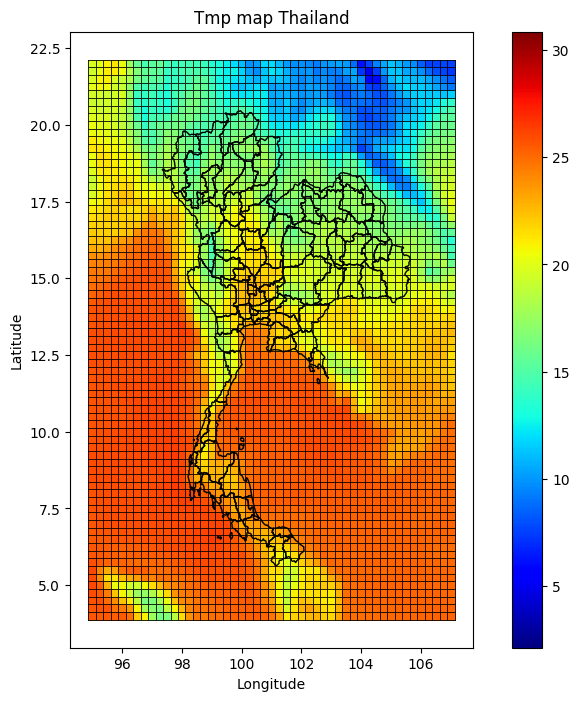

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/Era-Dataset/era_data_grid_1960.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# สร้าง plot
fig, ax = plt.subplots(figsize=(10, 8))

# แสดงผลข้อมูลพื้นที่ด้วย GeoPandas
data.plot(column='tnn', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

shapefile.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Tmp map Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [2]:
import xarray as xr
import pandas as pd
import json
import xclim as xc

# โหลดข้อมูลจาก NetCDF
tmp = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
pre = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.pre.dat.nc')
tmn = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmn.dat.nc')
tmx = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmx.dat.nc')

# แก้ไขหน่วยของอุณหภูมิให้ถูกต้อง
tmp['tmp'].attrs['units'] = 'degC'
tmn['tmn'].attrs['units'] = 'degC'
tmx['tmx'].attrs['units'] = 'degC'

def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# วนลูปข้อมูลตามปี
for i in range(0, 10):  # ตัวอย่างวนลูป 10 ปี
    year = 1901 + i
    temp = tmp.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    pre_temp = pre.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    tmn_temp = tmn.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    tmx_temp = tmx.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

    # คำนวณ TXx (ความร้อนสูงสุดรายเดือน)
    txx = xc.indices.tx_max(tmx_temp['tmx'], freq='MS')

    # คำนวณ TNn (ความเย็นต่ำสุดรายเดือน)
    tnn = xc.indices.tn_min(tmn_temp['tmn'], freq='MS')

    # เตรียมข้อมูลสำหรับ GeoJSON
    lon = temp['lon'].values
    lat = temp['lat'].values
    lon_step = float(lon[1] - lon[0])
    lat_step = float(lat[1] - lat[0])

    features = []
    for time_index, time in enumerate(pd.to_datetime(txx['time'].values)):
        month = time.month
        txx_in_month = txx.isel(time=time_index).values
        tnn_in_month = tnn.isel(time=time_index).values
        temp_in_month = temp.isel(time=time_index)['tmp'].values
        pre_in_month = pre_temp.isel(time=time_index)['pre'].values
        tmx_in_month = tmx_temp.isel(time=time_index)['tmx'].values
        tmn_in_month = tmn_temp.isel(time=time_index)['tmn'].values

        for i, lon_value in enumerate(lon):
            for j, lat_value in enumerate(lat):
                tx_max = txx_in_month[j, i]
                tn_min = tnn_in_month[j, i]
                temperature = temp_in_month[j, i]
                precipitation = pre_in_month[j, i]
                tmx_value = tmx_in_month[j, i]
                tmn_value = tmn_in_month[j, i]

                if not pd.isnull(tx_max) and not pd.isnull(tn_min):
                    grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
                    features.append({
                        "type": "Feature",
                        "geometry": {
                            "type": "Polygon",
                            "coordinates": [grid_polygon]
                        },
                        "properties": {
                            "temperature": float(temperature) if not pd.isnull(temperature) else None,
                            "pre": float(precipitation) if not pd.isnull(precipitation) else None,
                            "txx": float(tx_max),
                            "tnn": float(tn_min),
                            "tmx": float(tmx_value) if not pd.isnull(tmx_value) else None,
                            "tmn": float(tmn_value) if not pd.isnull(tmn_value) else None,
                            "month": month
                        }
                    })

    # สร้าง GeoJSON
    geojson_data = {
        "type": "FeatureCollection",
        "features": features
    }

    # บันทึก GeoJSON ลงไฟล์
    output_file = f"../Geo-data/Year-Dataset/data_grid_index_{year}.json"
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(geojson_data, f, ensure_ascii=False, indent=4)

    print(f"Save to location : {output_file}")



C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indicator.py:289: UserWarning: Class RAIN_FRZGR already exists and will be overwritten.
  warnings.warn(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indicator.py:289: UserWarning: Class RX1DAY already exists and will be overwritten.
  warnings.warn(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indicator.py:289: UserWarning: Class MAX_N_DAY_PRECIPITATION_AMOUNT already exists and will be overwritten.
  warnings.warn(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indicator.py:289: UserWarning: Class WETDAYS already exists and will be overwritten.
  warnings.warn(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indicator.py:289: UserWarning: Class WETDAYS_PROP already exists and will be overwritten.
  warnings.warn(
C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\xclim\core\indi

KeyboardInterrupt: 